In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Assignment1_StreamFlow_Subscription_Data.csv')

## Dataset Analysis

In [260]:
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN


In [261]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [262]:
# Convert subscription dates to datetime format and convert by quarter
df['Subscription_Start_Date'] = pd.to_datetime(df['Subscription_Start_Date'])
df['Quarter'] = df['Subscription_Start_Date'].dt.to_period('Q')
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Quarter
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN,2020Q2
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN,2024Q1
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN,2022Q4
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN,2022Q1
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN,2020Q1


In [263]:
#Create Satisfaction Variable
def value(group):
    if group['Rating_Given'] == 5:
        return 'Very Satisfied'
    elif group['Rating_Given'] == 4 or group['Rating_Given'] == 3:
        return 'Satisfied'
    else:
        return 'Dissatisfied'

df['Satisfaction_level'] = df.apply(value, axis=1)
df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Quarter,Satisfaction_level
0,1,56,Other,Central,2020-06-07 01:53:37.656934,Premium,19.99,Credit Card,31.513153,Action,PC,1.195762,1023,5,0,NaN,NaN,2020Q2,Very Satisfied
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN,2024Q1,Dissatisfied
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN,2022Q4,Dissatisfied
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN,2022Q1,Dissatisfied
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN,2020Q1,Satisfied


In [264]:
#Isolate Churned Users
churned_df = df[df['Churned'] == 1]
churned_df.describe()

,User_ID,Age,Subscription_Start_Date,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,246.000000,246.000000,246,246.000000,246.000000,246.000000,246.000000,246.000000,246.0
mean,505.361789,43.174797,2021-08-17 06:52:09.857642752,14.502195,17.039672,1.920114,1050.443089,2.593496,1.0
min,13.000000,18.000000,2019-05-13 01:53:37.658474,9.990000,0.041574,0.000821,1000.000000,1.000000,1.0
25%,273.250000,30.000000,2020-04-22 07:53:37.663491072,9.990000,5.105890,0.641881,1022.250000,2.000000,1.0
50%,501.500000,41.000000,2021-05-01 01:53:37.660559104,14.990000,11.948593,1.277379,1050.000000,2.000000,1.0
75%,752.250000,56.000000,2022-11-26 19:53:37.664207360,14.990000,23.618435,2.704228,1077.750000,3.000000,1.0
max,999.000000,70.000000,2024-04-30 01:53:37.659297,19.990000,108.122364,11.417557,1099.000000,5.000000,1.0
std,284.676765,15.507139,NaN,3.494289,17.236483,1.841691,30.536877,1.273513,0.0


In [265]:
#Identify all the users who have Churned and for what reason
churned_df['Reason_for_Churn'].value_counts().reset_index()

,Reason_for_Churn,count
0,Price increase,68
1,Found better service,64
2,Personal reasons,62
3,Dissatisfied with content,52


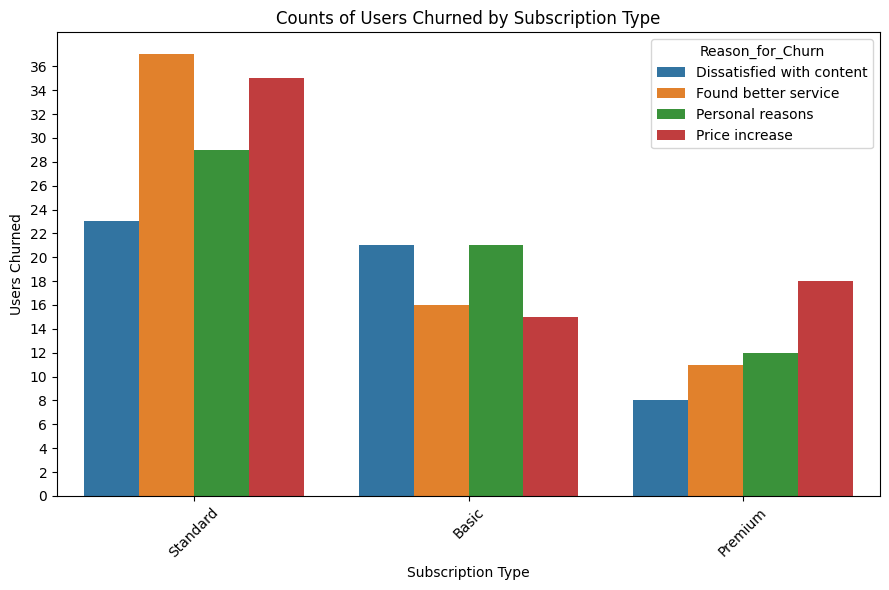

In [266]:
#Visualize for users who have churned by their reason and subscription type
sub_churn = churned_df.groupby('Reason_for_Churn')['Subscription_Type'].value_counts().reset_index(name='Count')

plt.figure(figsize=(9, 6))
sns.barplot(data=sub_churn, x='Subscription_Type', y='Count', hue='Reason_for_Churn')


plt.xlabel('Subscription Type')
plt.ylabel('Users Churned')
plt.title('Counts of Users Churned by Subscription Type')
plt.xticks(rotation=45)

max_count = sub_churn['Count'].max()
y_ticks = range(0, max_count + 1, 2)  
plt.yticks(y_ticks)

plt.tight_layout()
plt.show()

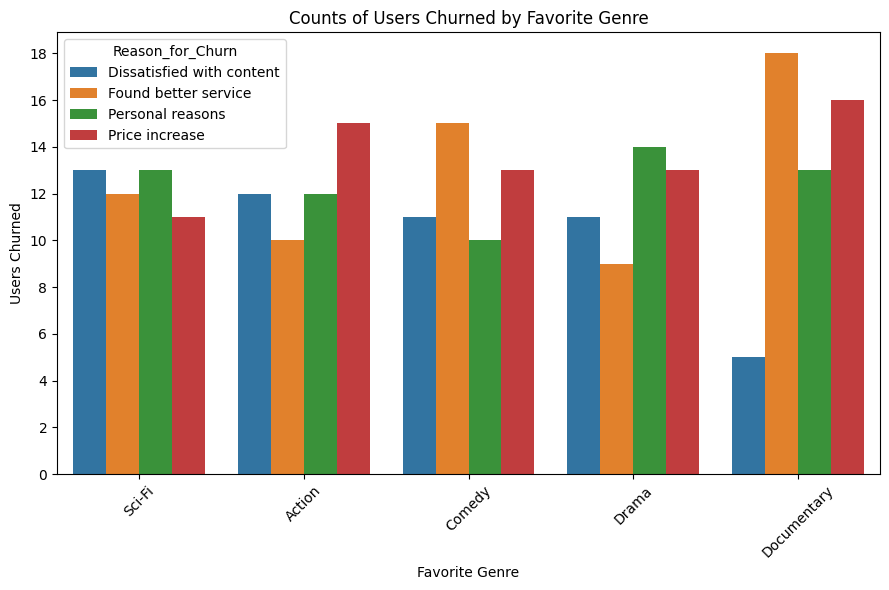

In [267]:
#Visualize for users who have churned by their reason and favourite genres
genre_churn = churned_df.groupby('Reason_for_Churn')['Favorite_Genre'].value_counts().reset_index(name='Count')

plt.figure(figsize=(9, 6))
sns.barplot(data=genre_churn, x='Favorite_Genre', y='Count', hue='Reason_for_Churn')


plt.xlabel('Favorite Genre')
plt.ylabel('Users Churned')
plt.title('Counts of Users Churned by Favorite Genre')
plt.xticks(rotation=45)

max_count = genre_churn['Count'].max()
y_ticks = range(0, max_count + 1, 2)  
plt.yticks(y_ticks)

plt.tight_layout()
plt.show()

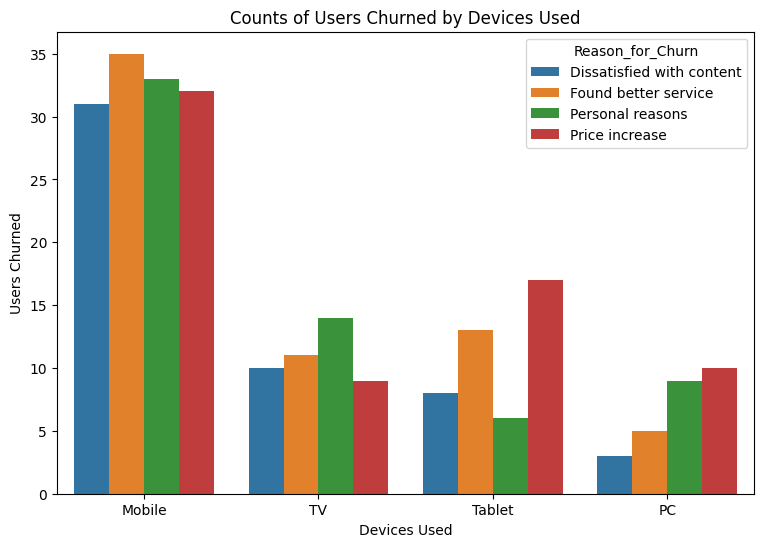

In [268]:
#Visualize relationship between users churned and devices used
devices_churn = churned_df.groupby('Reason_for_Churn')['Devices_Used'].value_counts().reset_index(name='Count')

plt.figure(figsize=(9,6))
sns.barplot(data=devices_churn, x='Devices_Used', y='Count', hue='Reason_for_Churn')

plt.xlabel('Devices Used')
plt.ylabel('Users Churned')
plt.title('Counts of Users Churned by Devices Used')

plt.tight_layout
plt.show()


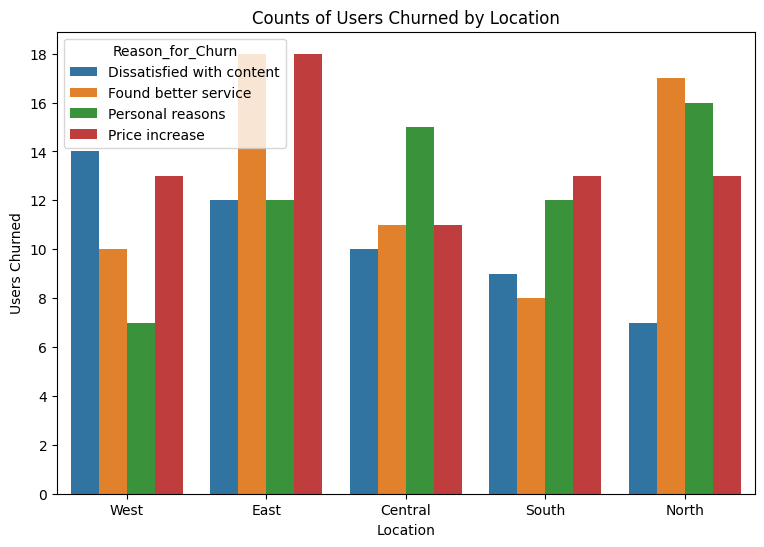

In [269]:
#Visualize Users Churned by Location
location_churn = churned_df.groupby('Reason_for_Churn')['Location'].value_counts().reset_index(name='Count')

plt.figure(figsize=(9,6))
sns.barplot(data=location_churn, x='Location', y='Count', hue='Reason_for_Churn')

plt.xlabel('Location')
plt.ylabel('Users Churned')
plt.title('Counts of Users Churned by Location')

plt.yticks(y_ticks)

plt.tight_layout
plt.show()


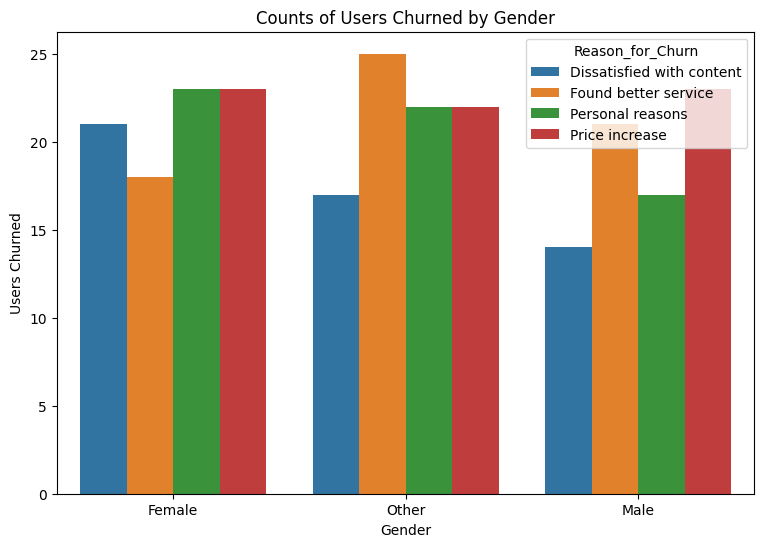

In [270]:
#Visualize Users Churned by Gender
gender_churn = churned_df.groupby('Reason_for_Churn')['Gender'].value_counts().reset_index(name='Count')

plt.figure(figsize=(9,6))
sns.barplot(data=gender_churn, x='Gender', y='Count', hue='Reason_for_Churn')

plt.xlabel('Gender')
plt.ylabel('Users Churned')
plt.title('Counts of Users Churned by Gender')

plt.tight_layout
plt.show()

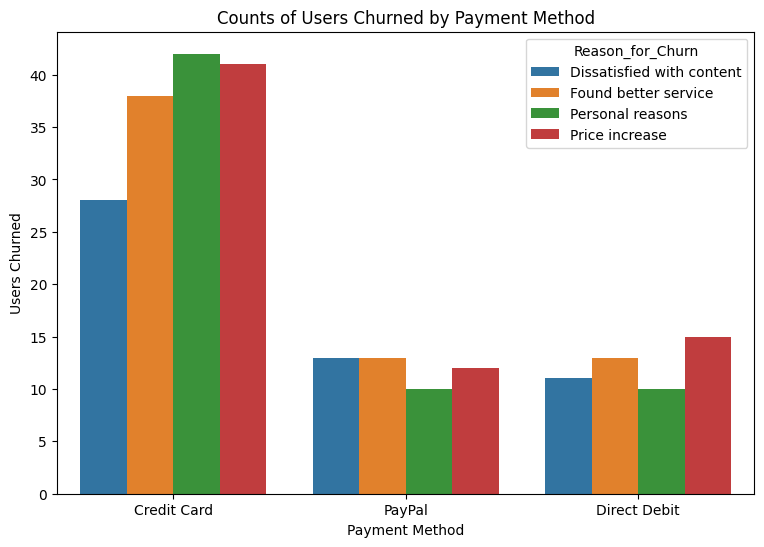

In [271]:
payment_churn = churned_df.groupby('Reason_for_Churn')['Payment_Method'].value_counts().reset_index(name='Count')

plt.figure(figsize=(9,6))
sns.barplot(data=payment_churn, x='Payment_Method', y='Count', hue='Reason_for_Churn')

plt.xlabel('Payment Method')
plt.ylabel('Users Churned')
plt.title('Counts of Users Churned by Payment Method')

plt.tight_layout
plt.show()

In [272]:
#Isolate Standard Users
standard_df = df[df['Subscription_Type'] == 'Standard']
standard_df.head()

,User_ID,Age,Gender,Location,Subscription_Start_Date,Subscription_Type,Monthly_Payment,Payment_Method,Monthly_Hours_Watched,Favorite_Genre,Devices_Used,Average_Session_Length,Content_ID,Rating_Given,Churned,Date_of_Churn,Reason_for_Churn,Quarter,Satisfaction_level
1,2,69,Other,West,2024-02-21 01:53:37.656980,Standard,14.99,Credit Card,4.982277,Drama,PC,0.809002,1076,1,0,NaN,NaN,2024Q1,Dissatisfied
2,3,46,Female,North,2022-10-06 01:53:37.656995,Standard,14.99,PayPal,4.114953,Sci-Fi,Tablet,1.153570,1095,2,0,NaN,NaN,2022Q4,Dissatisfied
3,4,32,Female,East,2022-01-04 01:53:37.657006,Standard,14.99,Credit Card,60.244820,Action,TV,0.609503,1003,1,0,NaN,NaN,2022Q1,Dissatisfied
4,5,60,Female,North,2020-03-13 01:53:37.657017,Standard,14.99,Credit Card,4.711855,Sci-Fi,Mobile,0.359971,1012,4,0,NaN,NaN,2020Q1,Satisfied
8,9,36,Male,East,2021-09-29 01:53:37.657064,Standard,14.99,Credit Card,24.052576,Drama,PC,0.770118,1036,2,0,NaN,NaN,2021Q3,Dissatisfied


In [273]:
#Isolate standard users that have churned
standard_churn_df = df[(df['Churned'] == 1) & (df['Subscription_Type'] == 'Standard')]
standard_churn_df['Reason_for_Churn'].value_counts().reset_index()

,Reason_for_Churn,count
0,Found better service,37
1,Price increase,35
2,Personal reasons,29
3,Dissatisfied with content,23


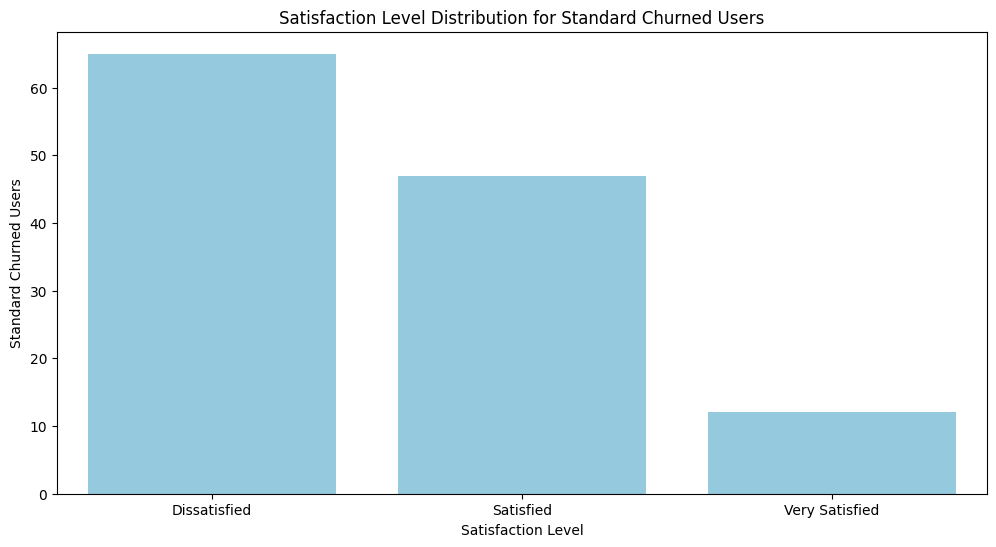

  Subscription_Type Satisfaction_level  Count
0          Standard       Dissatisfied     65
1          Standard          Satisfied     47
2          Standard     Very Satisfied     12


In [274]:
#Separate standard churned users by satisfaction level 
standard_satisfaction_churn  = standard_churn_df.groupby('Subscription_Type')['Satisfaction_level'].value_counts().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=standard_satisfaction_churn, x='Satisfaction_level', y='Count', color='skyblue')


plt.xlabel('Satisfaction Level')
plt.ylabel('Standard Churned Users')
plt.title('Satisfaction Level Distribution for Standard Churned Users')

plt.tight_layout
plt.show()

print(standard_satisfaction_churn)

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_52152/2574511948.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_churn_df['Satisfaction_level'] = standard_churn_df['Rating_Given']


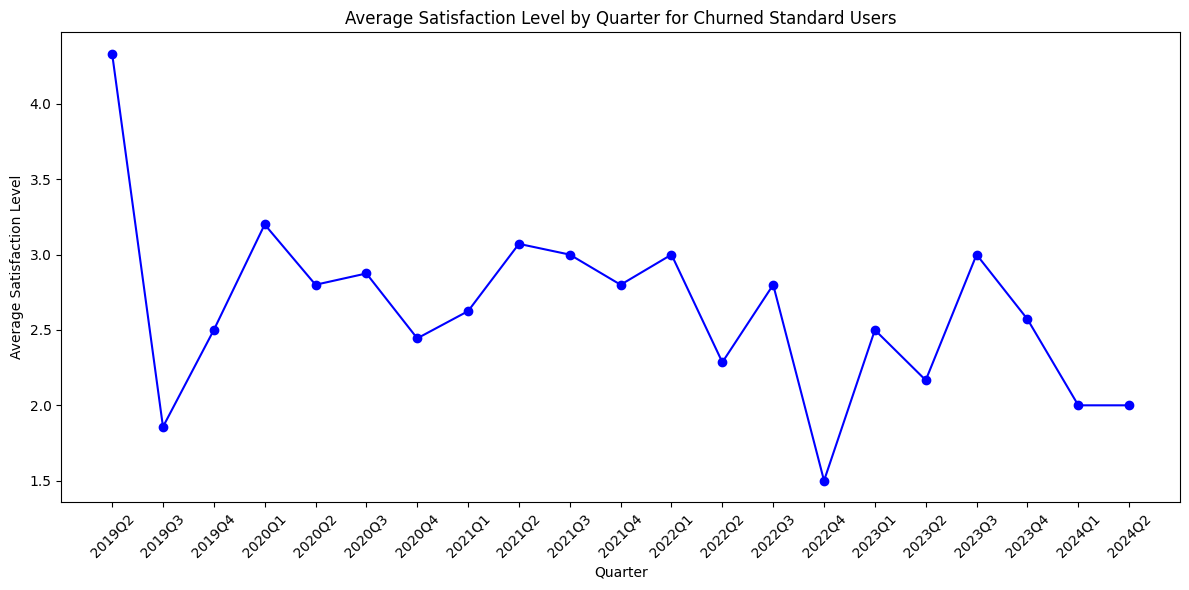

In [275]:
#Visualize average satisfaction level for Standard Churned users over the quarters

standard_churn_df['Satisfaction_level'] = standard_churn_df['Rating_Given']

satisfaction_quarter = standard_churn_df.groupby('Quarter')['Satisfaction_level'].mean().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(satisfaction_quarter.index.astype(str), satisfaction_quarter, marker='o', linestyle='-', color='blue')


plt.xlabel('Quarter')
plt.ylabel('Average Satisfaction Level')
plt.title('Average Satisfaction Level by Quarter for Churned Standard Users')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_52152/1064585619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_df['Price'] = churned_df['Monthly_Payment']


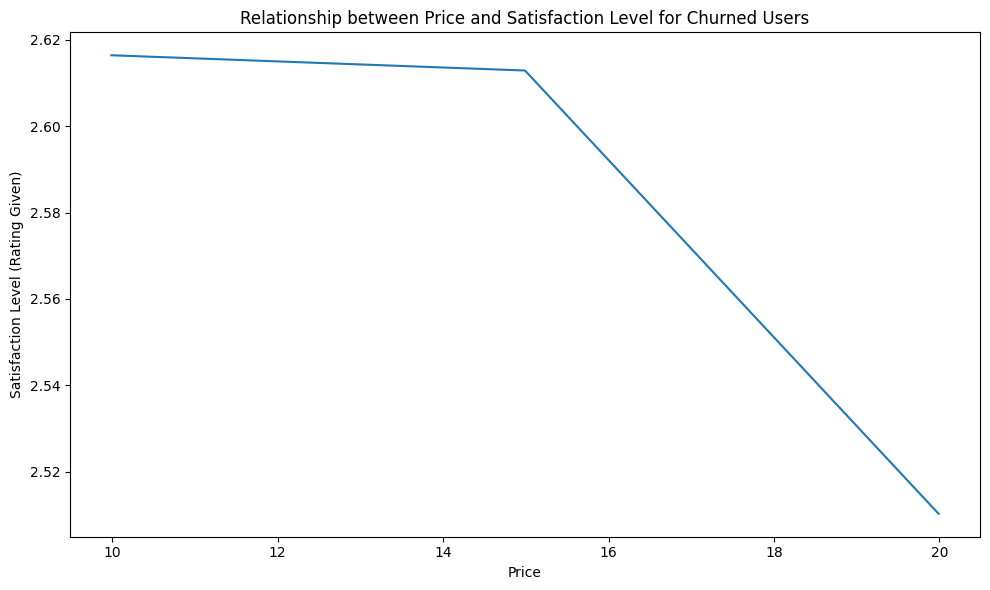

In [276]:
#Attempted to reveal downwards trend between Price and Satisfaction level for Churned Customers

churned_df['Price'] = churned_df['Monthly_Payment']

average_rating_by_price= churned_df.groupby('Price')['Rating_Given'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_rating_by_price['Price'], average_rating_by_price['Rating_Given'])


plt.xlabel('Price')
plt.ylabel('Satisfaction Level (Rating Given)')
plt.title('Relationship between Price and Satisfaction Level for Churned Users')


plt.tight_layout()
plt.show()

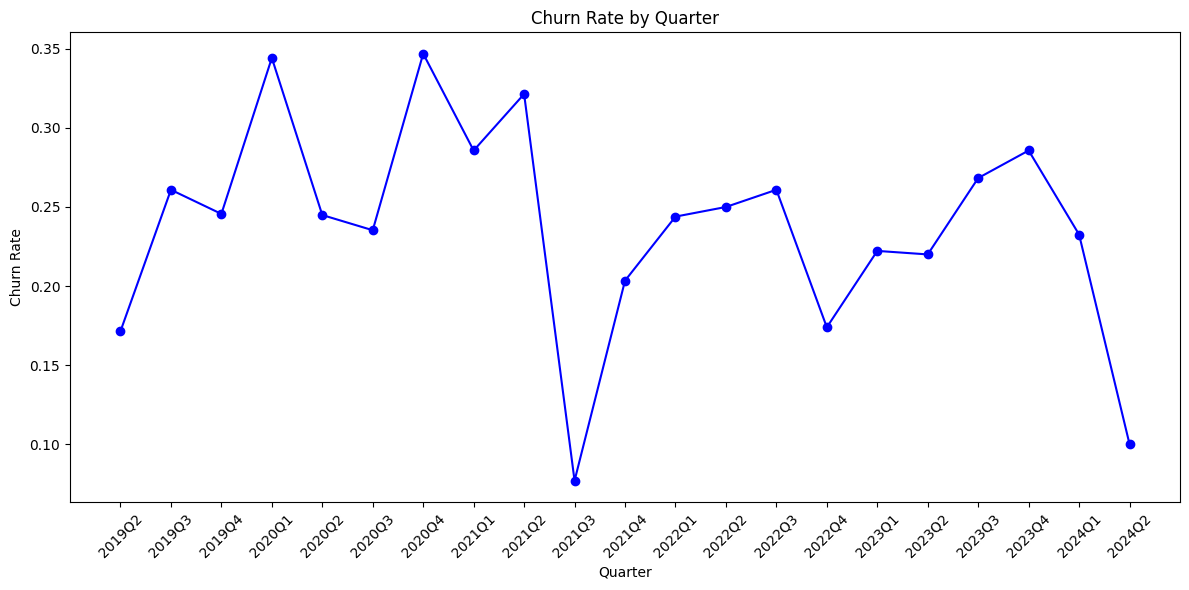

In [277]:
#Calculating Churn Rate by Quarter

quarterly_counts = df.groupby('Quarter')['Churned'].agg(Total='count', Churned='sum').reset_index()


quarterly_counts['Churn_Rate'] = quarterly_counts['Churned'] / quarterly_counts['Total']


plt.figure(figsize=(12, 6))
plt.plot(quarterly_counts['Quarter'].astype(str), quarterly_counts['Churn_Rate'], color='blue',marker='o')


plt.xlabel('Quarter')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Quarter')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()



#Business Impact Estimate

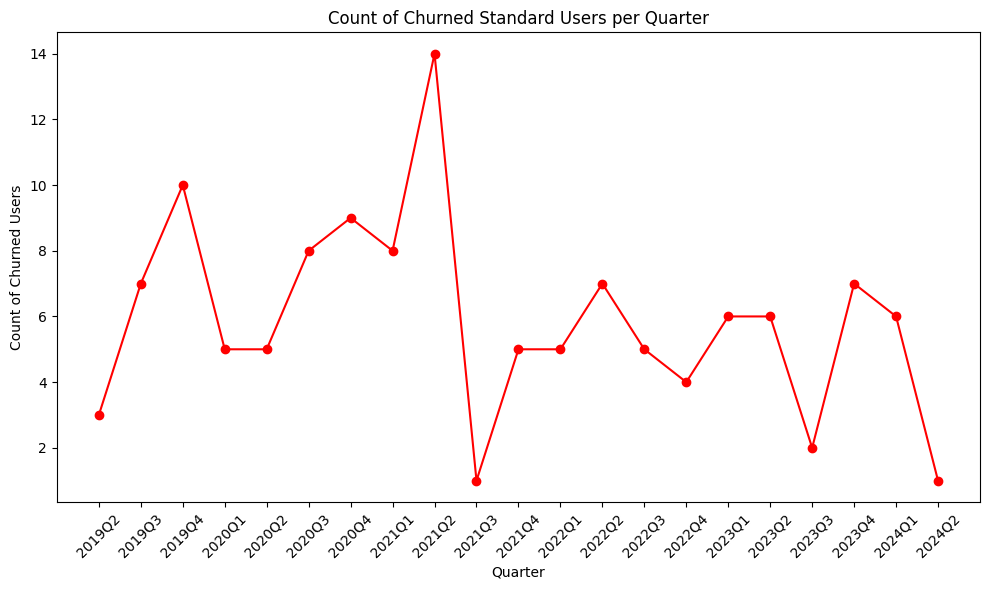

In [278]:
#Find number of standard users who have churned each quarter
standard_churn_df_per_quarter = standard_churn_df.groupby('Quarter').size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
plt.plot(standard_churn_df_per_quarter['Quarter'].astype(str), standard_churn_df_per_quarter['Count'], color='red', marker='o')


plt.xlabel('Quarter')
plt.ylabel('Count of Churned Users')
plt.title('Count of Churned Standard Users per Quarter')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


In [279]:
#How many Standard users Churned last Quarter
standard_2024Q1_churn = standard_churn_df[standard_churn_df['Quarter'] == '2024Q1']
standard_2024Q1_churn.count().reset_index()

,index,0
0,User_ID,6
1,Age,6
2,Gender,6
3,Location,6
4,Subscription_Start_Date,6
5,Subscription_Type,6
6,Monthly_Payment,6
7,Payment_Method,6
8,Monthly_Hours_Watched,6
9,Favorite_Genre,6


In [280]:
#Revenue Estimation
revenue_loss = 14.99 * 6
print(revenue_loss)

retained_user_revenue = 8.99 * 6
print(retained_user_revenue)

89.94
53.94
